In [94]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_df = pd.read_csv(r"C:\Users\DELL\Downloads\archive (6)\Training_set.csv")
test_df  = pd.read_csv(r"C:\Users\DELL\Downloads\archive (6)\Testing_set.csv")

In [95]:
train_df.shape

(6499, 2)

In [96]:
test_df.shape

(2786, 1)

In [97]:
print("Training CSV columns:", train_df.columns)
print("Testing  CSV columns:", test_df.columns)

Training CSV columns: Index(['filename', 'label'], dtype='object')
Testing  CSV columns: Index(['filename'], dtype='object')


In [98]:
print(train_df.head())

      filename                     label
0  Image_1.jpg          SOUTHERN DOGFACE
1  Image_2.jpg                    ADONIS
2  Image_3.jpg            BROWN SIPROETA
3  Image_4.jpg                   MONARCH
4  Image_5.jpg  GREEN CELLED CATTLEHEART


In [109]:
print(train_df.shape)

(6499, 2)


In [99]:
print(train_df['label'].unique())

['SOUTHERN DOGFACE' 'ADONIS' 'BROWN SIPROETA' 'MONARCH'
 'GREEN CELLED CATTLEHEART' 'CAIRNS BIRDWING' 'EASTERN DAPPLE WHITE'
 'RED POSTMAN' 'MANGROVE SKIPPER' 'BLACK HAIRSTREAK' 'CABBAGE WHITE'
 'RED ADMIRAL' 'PAINTED LADY' 'PAPER KITE' 'SOOTYWING' 'PINE WHITE'
 'PEACOCK' 'CHECQUERED SKIPPER' 'JULIA' 'COMMON WOOD-NYMPH' 'BLUE MORPHO'
 'CLOUDED SULPHUR' 'STRAITED QUEEN' 'ORANGE OAKLEAF' 'PURPLISH COPPER'
 'ATALA' 'IPHICLUS SISTER' 'DANAID EGGFLY' 'LARGE MARBLE'
 'PIPEVINE SWALLOW' 'BLUE SPOTTED CROW' 'RED CRACKER' 'QUESTION MARK'
 'CRIMSON PATCH' 'BANDED PEACOCK' 'SCARCE SWALLOW' 'COPPER TAIL'
 'GREAT JAY' 'INDRA SWALLOW' 'VICEROY' 'MALACHITE' 'APPOLLO'
 'TWO BARRED FLASHER' 'MOURNING CLOAK' 'TROPICAL LEAFWING' 'POPINJAY'
 'ORANGE TIP' 'GOLD BANDED' 'BECKERS WHITE' 'RED SPOTTED PURPLE'
 'MILBERTS TORTOISESHELL' 'SILVER SPOT SKIPPER' 'AMERICAN SNOOT' 'AN 88'
 'ULYSES' 'COMMON BANDED AWL' 'CRECENT' 'METALMARK' 'SLEEPY ORANGE'
 'PURPLE HAIRSTREAK' 'ELBOWED PIERROT' 'GREAT EGGFLY' 'ORCHARD 

In [100]:
print(train_df['label'].nunique())

75


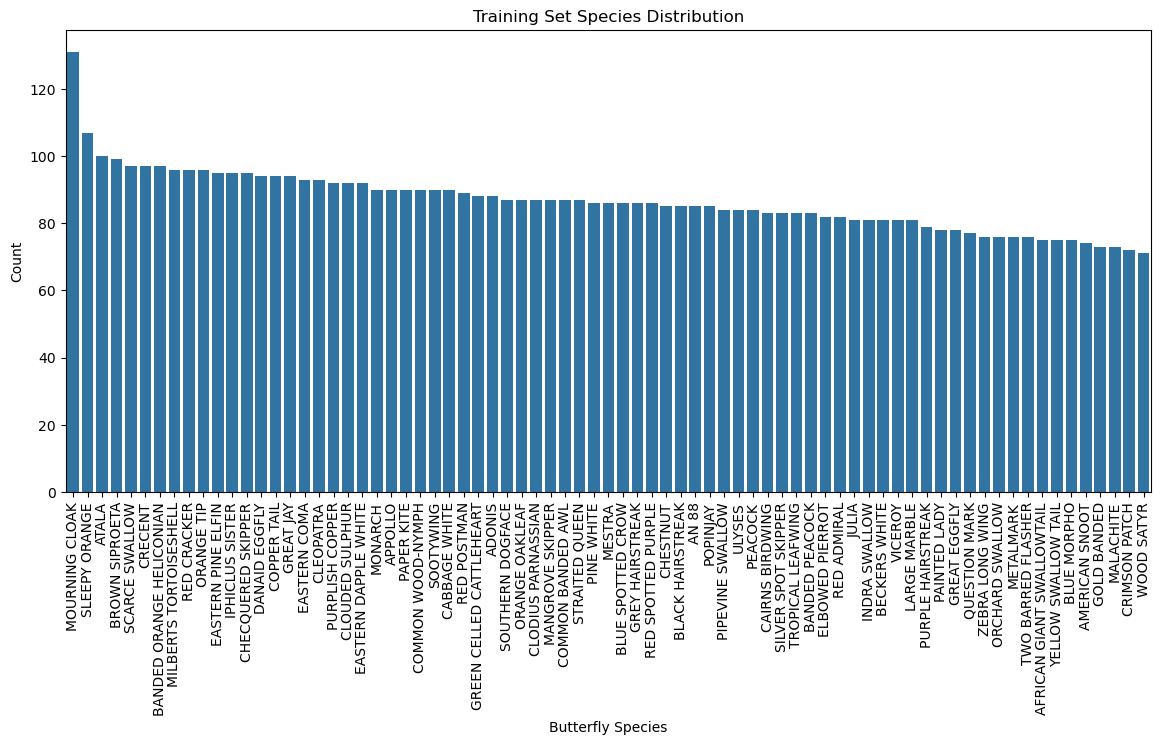

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = train_df['label'].value_counts()
plt.figure(figsize=(14,6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xticks(rotation=90)
plt.title("Training Set Species Distribution")
plt.xlabel("Butterfly Species")
plt.ylabel("Count")
plt.show()


In [ ]:
train_dir = (r"C:\Users\DELL\Downloads\archive (6)\train")
test_dir = (r"C:\Users\DELL\Downloads\archive (6)\test")
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_dir,
    x_col="filename",
    y_col="label",
    target_size=(128,128),
    class_mode="categorical",
    batch_size=32,
    subset="training"
)

val_data = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_dir,
    x_col="filename",
    y_col="label",
    target_size=(128,128),
    class_mode="categorical",
    batch_size=32,
    subset="validation"
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col="filename",
    y_col=None,
    target_size=(128,128),
    class_mode=None,
    batch_size=32,
    shuffle=False
)


Found 5200 validated image filenames belonging to 75 classes.
Found 1299 validated image filenames belonging to 75 classes.
Found 2786 validated image filenames.


In [103]:
print("Train samples:", train_data.n)
print("Validation samples:", val_data.n)
print("Test samples:", test_data.n)

Train samples: 5200
Validation samples: 1299
Test samples: 2786


In [104]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5), 
    Dense(75, activation='softmax')  
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 75)             │         9,675 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,314,315 (12.64 MB)

 Trainable params: 3,314,315 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [105]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_loss",    
    patience=3,           
    restore_best_weights=True
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stop]
)



Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 369ms/step - accuracy: 0.0333 - loss: 4.1853 - val_accuracy: 0.1363 - val_loss: 3.7485
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 346ms/step - accuracy: 0.1329 - loss: 3.5324 - val_accuracy: 0.2671 - val_loss: 2.9442
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 343ms/step - accuracy: 0.2512 - loss: 2.9087 - val_accuracy: 0.4049 - val_loss: 2.4366
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 340ms/step - accuracy: 0.3379 - loss: 2.4879 - val_accuracy: 0.4711 - val_loss: 2.0641
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 344ms/step - accuracy: 0.4125 - loss: 2.1165 - val_accuracy: 0.4935 - val_loss: 1.9851
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 345ms/step - accuracy: 0.4790 - loss: 1.8157 - val_accuracy: 0.5443 - val_loss: 1.7878
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 360ms/step - accuracy: 0.5348 - loss: 1.5913 - val_accuracy: 0.5266 - val_loss: 1.7581
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 354ms/step - accuracy: 0.5763 - loss: 1

In [106]:
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])
print("Final Training Loss:", history.history['loss'][-1])
print("Final Validation Loss:", history.history['val_loss'][-1])

Final Training Accuracy: 0.7378846406936646
Final Validation Accuracy: 0.5719784498214722
Final Training Loss: 0.7983250021934509
Final Validation Loss: 1.767907977104187
